### Goldsmiths University of London
### Author....: Carlos Manuel de Oliveira Alves
### Student...: cdeol003
### Created...: 08/02/2023
### FYP.......: NeuroCredit

## I. Import Libraries and Packages

In [217]:
# Importing the pandas library to read the data
import pandas as pd

# Importing the numpy library to perform numerical operations
import numpy as np

# Importing the matplotlib library to plot the data
import matplotlib.pyplot as plt

# Importing module to split the data into training and test sets
from sklearn.model_selection import train_test_split

# Importing the StandardScaler module to scale the data
from sklearn.preprocessing import StandardScaler

# Importing the Logistic Regression module
from sklearn.linear_model import LogisticRegression

# Importing the metrics module to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing the RandomForestClassifier module
from sklearn.ensemble import RandomForestClassifier

# Importing the Support Vector Classifier module
from sklearn.svm import SVC

## II. Data Inspection and Visualisation

### a. Loading the Dataset

In [218]:
# Reading the data with credit loans data
data = pd.read_csv('data.csv')

### b. Inspecting the Data Structure

In [219]:
# Printing the first 5 rows of the data
data.head().T

,0,1,2,3,4
credit_history,Good,Fair,Fair,Poor,Poor
employment_status,Unemployed,Unemployed,Unemployed,Employed,Self-Employed
collateral,None,Car,Other,Investment,Land
payment_history,Excellent,Good,Poor,Fair,Fair
type_of_credit_accounts,Auto,Mortgage,Mortgage,Student,Personal
public_records_and_collections,Judgement,Tax Lien,None,Bankruptcy,None
purpose_of_loan,Home Improvement,Other,Business,Other,Car Financing
income,11647,40599,41168,21088,48586
assets_value,36650,31948,34259,37383,18792
debt_to_income_ratio,19,22,20,11,88


In [220]:
# Print the first 5 rows of the data with the approval status approved
data[data['approval_status'] == 1].head().T

,6,20,25,53,54
credit_history,Good,Good,Good,Good,Good
employment_status,Self-Employed,Employed,Self-Employed,Self-Employed,Employed
collateral,Land,Car,Car,Car,Car
payment_history,Good,Good,Fair,Poor,Poor
type_of_credit_accounts,Other,Student,Mortgage,Auto,Personal
public_records_and_collections,Collection,None,Other,Judgement,Other
purpose_of_loan,Other,Business,Business,Home Improvement,Business
income,30482,34386,31670,32142,33362
assets_value,25357,27846,37984,46329,15882
debt_to_income_ratio,85,47,84,85,44


In [221]:
# Display concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   credit_history                                   1000 non-null   object
 1   employment_status                                1000 non-null   object
 2   collateral                                       1000 non-null   object
 3   payment_history                                  1000 non-null   object
 4   type_of_credit_accounts                          1000 non-null   object
 5   public_records_and_collections                   1000 non-null   object
 6   purpose_of_loan                                  1000 non-null   object
 7   income                                           1000 non-null   int64 
 8   assets_value                                     1000 non-null   int64 
 9   debt_to_income_ratio                      

### c. Convert the integer values to float values

In [222]:
# Get the list of columns with int64 data type
int_columns = data.select_dtypes(include=['int64']).columns

# Convert the int64 columns to float64 columns
data[int_columns] = data[int_columns].astype('float64')

# Display concise summary of a DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   credit_history                                   1000 non-null   object 
 1   employment_status                                1000 non-null   object 
 2   collateral                                       1000 non-null   object 
 3   payment_history                                  1000 non-null   object 
 4   type_of_credit_accounts                          1000 non-null   object 
 5   public_records_and_collections                   1000 non-null   object 
 6   purpose_of_loan                                  1000 non-null   object 
 7   income                                           1000 non-null   float64
 8   assets_value                                     1000 non-null   float64
 9   debt_to_income_ratio           

In [223]:
# Describing the dataset with the mean, standard deviation, min, max, etc.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1000.0,29974.263,11484.375080,10082.0,20258.5,29904.0,39644.25,50000.0
assets_value,1000.0,29904.983,11894.798064,10037.0,19084.0,29880.5,40456.00,49999.0
debt_to_income_ratio,1000.0,50.131,29.148645,0.0,25.0,50.0,75.00,100.0
length_of_credit_history,1000.0,50.014,28.757065,0.0,25.0,50.0,75.00,100.0
number_of_credit_inquiries,1000.0,2.417,1.670300,0.0,1.0,2.0,4.00,5.0
number_of_credit_accounts,1000.0,2.618,1.687876,0.0,1.0,3.0,4.00,5.0
number_of_credit_accounts_opened_last_12_months,1000.0,2.491,1.702003,0.0,1.0,2.0,4.00,5.0
current_balance_of_credit_accounts,1000.0,9719.805,5715.759175,3.0,4792.5,9489.0,14889.75,19962.0
total_credit_limit,1000.0,9774.981,5790.397826,42.0,4713.5,9672.0,14951.50,19996.0
total_credit_utilization,1000.0,50.323,28.545359,0.0,25.0,50.0,75.00,100.0


### c. Visualising the Dataset

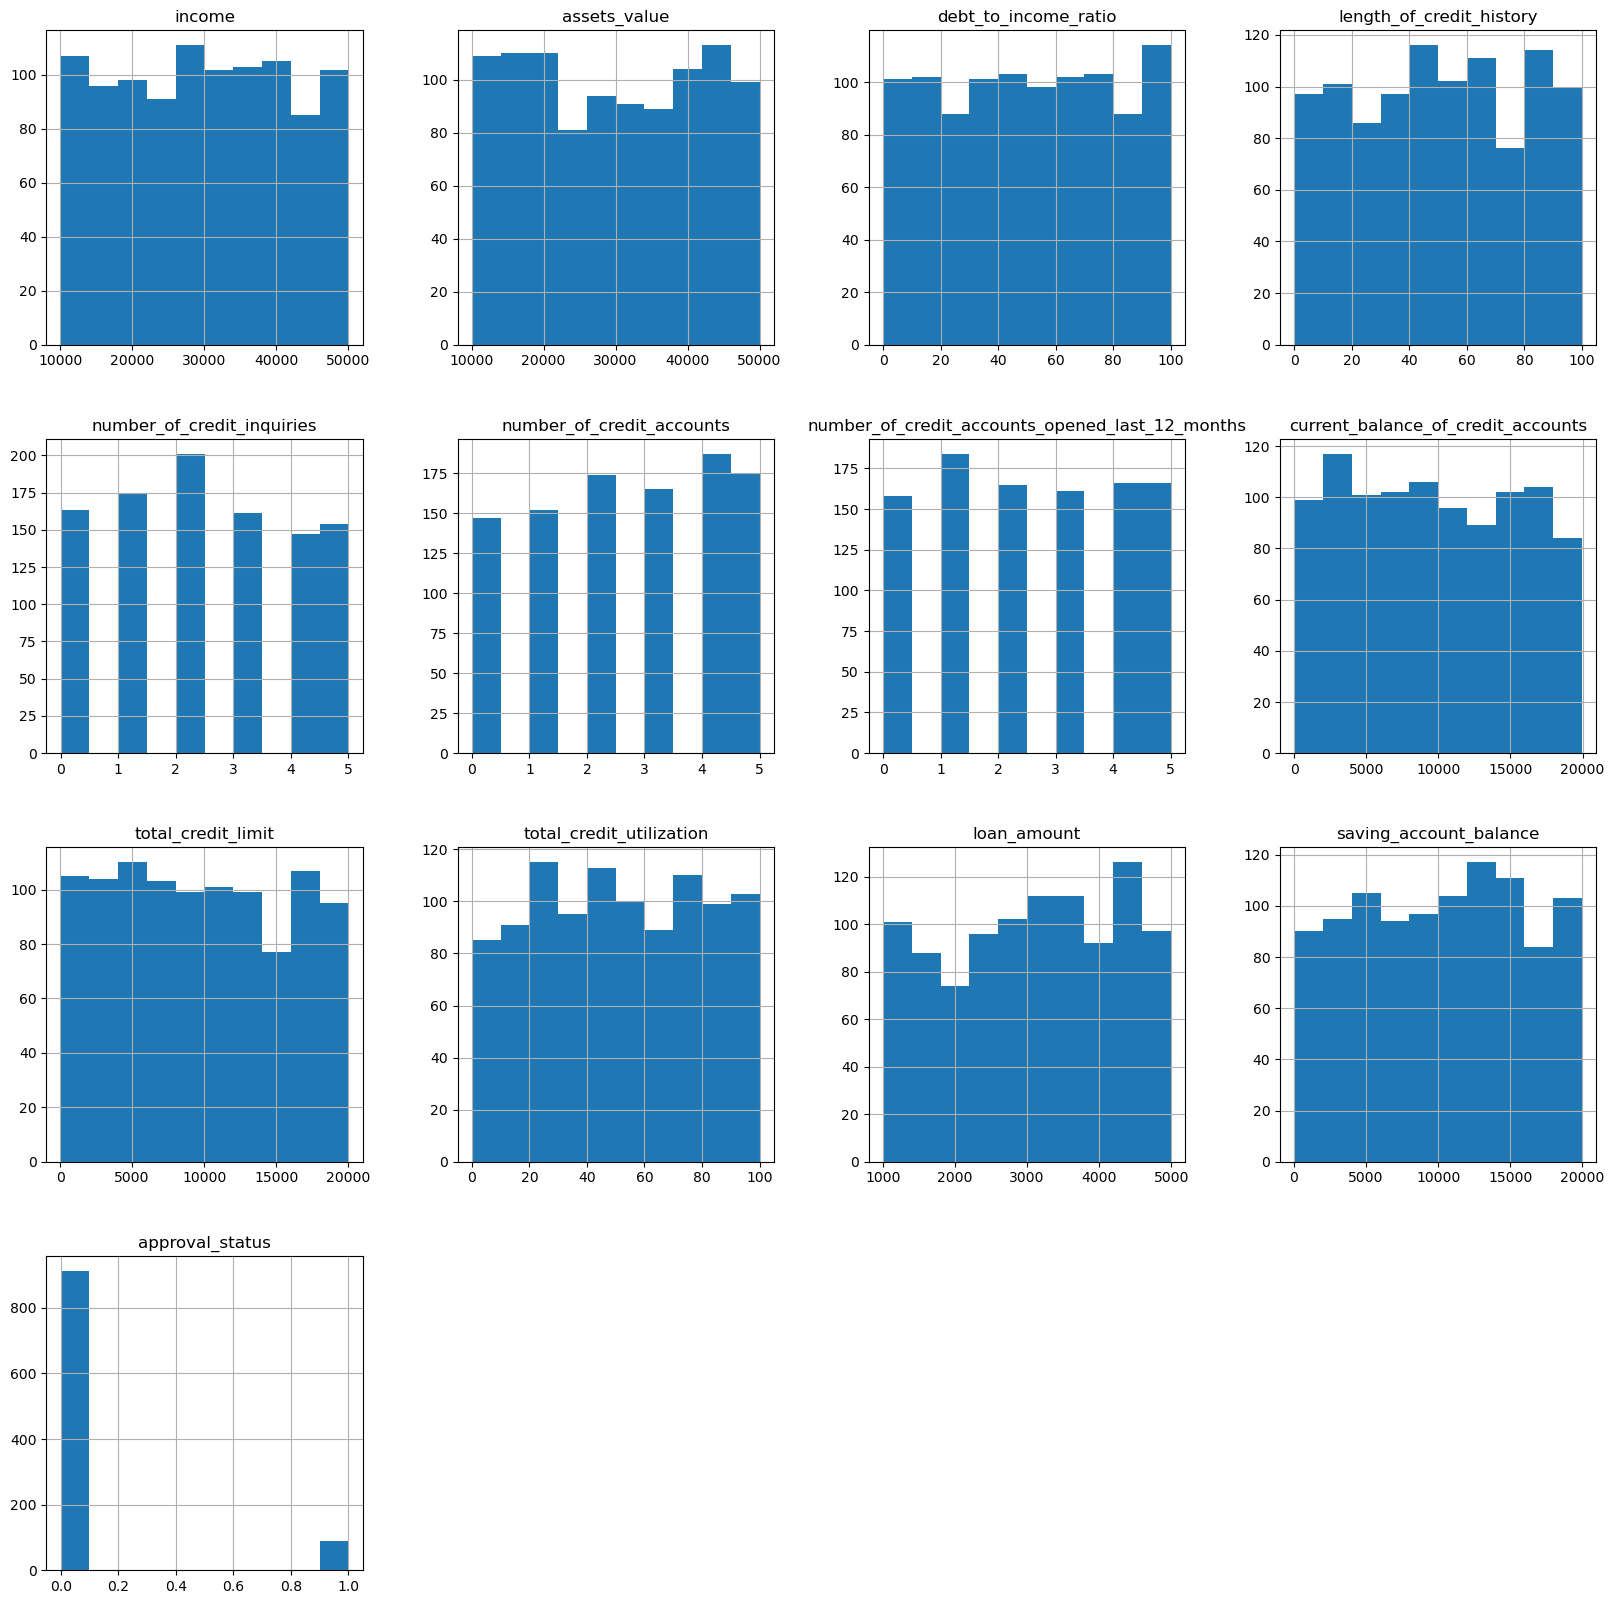

In [224]:
# Plotting the histogram of the data
data.hist(figsize=(20,20))
plt.show()

## III. Data Pre-Processing

### a. Check for Missing Values on the dataset

In [225]:
# Print the missing values in the dataset
data.isnull().sum()

credit_history                                     0
employment_status                                  0
collateral                                         0
payment_history                                    0
type_of_credit_accounts                            0
public_records_and_collections                     0
purpose_of_loan                                    0
income                                             0
assets_value                                       0
debt_to_income_ratio                               0
length_of_credit_history                           0
number_of_credit_inquiries                         0
number_of_credit_accounts                          0
number_of_credit_accounts_opened_last_12_months    0
current_balance_of_credit_accounts                 0
total_credit_limit                                 0
total_credit_utilization                           0
loan_amount                                        0
saving_account_balance                        

### b. Looking for Correlations

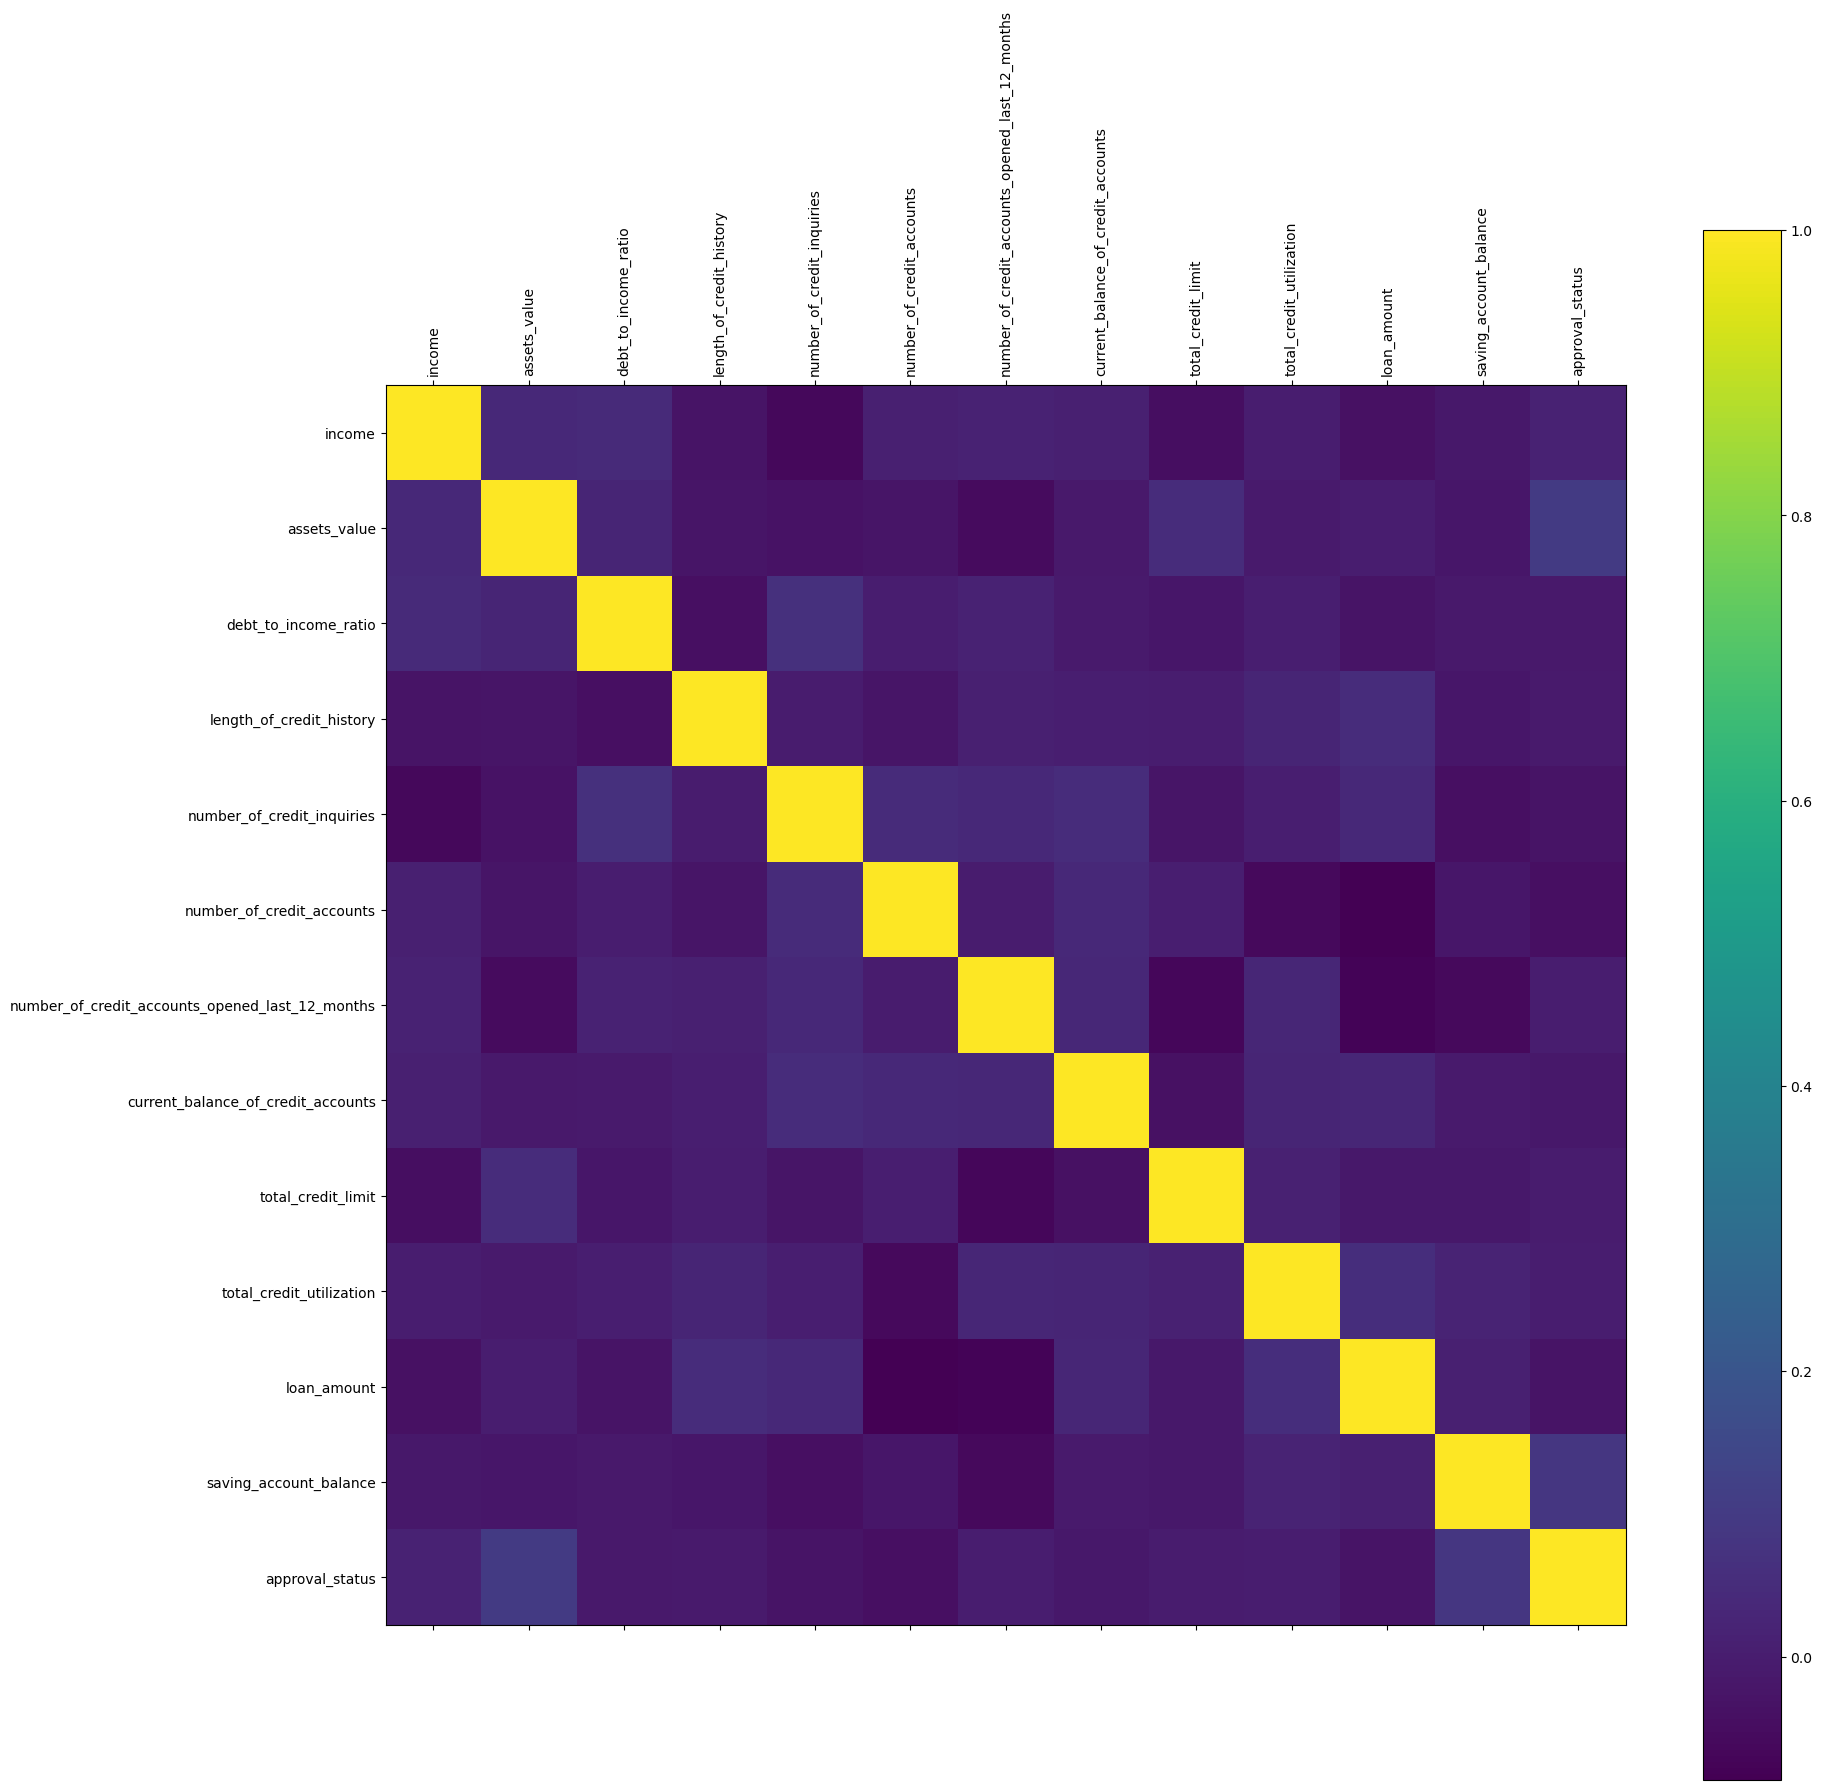

In [226]:
# Create a correlation matrix of the dataset
corr = data.corr()

# Plot the correlation matrix of the dataset
plt.figure(figsize=(20,20))
plt.matshow(corr, fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()


In [227]:
# Print the correlation matrix of the dataset
corr['income'].sort_values(ascending=False)


income                                             1.000000
debt_to_income_ratio                               0.043837
assets_value                                       0.040643
number_of_credit_accounts_opened_last_12_months    0.016279
approval_status                                    0.015341
number_of_credit_accounts                          0.009425
current_balance_of_credit_accounts                 0.009141
total_credit_utilization                          -0.000040
saving_account_balance                            -0.015297
length_of_credit_history                          -0.029184
loan_amount                                       -0.038877
total_credit_limit                                -0.044986
number_of_credit_inquiries                        -0.061352
Name: income, dtype: float64

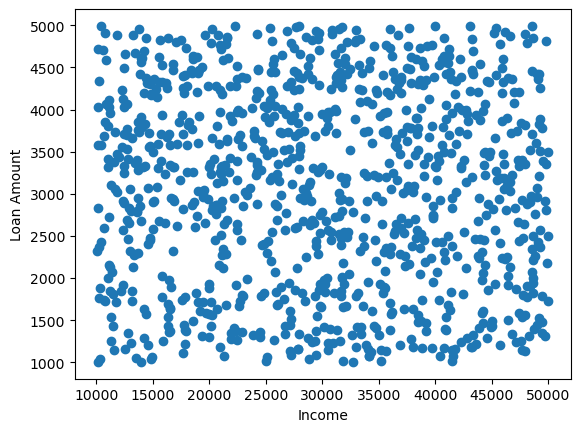

In [228]:
# Looking at the correlation matrix, we can see that the income is highly correlated with the loan amount
# Plotting the scatter plot of the income and loan amount
plt.scatter(data['income'], data['loan_amount'])
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()


In [229]:
# Print the correlation matrix of the dataset sorted by the absolute value
corr['income'].abs().sort_values(ascending=False)


income                                             1.000000
number_of_credit_inquiries                         0.061352
total_credit_limit                                 0.044986
debt_to_income_ratio                               0.043837
assets_value                                       0.040643
loan_amount                                        0.038877
length_of_credit_history                           0.029184
number_of_credit_accounts_opened_last_12_months    0.016279
approval_status                                    0.015341
saving_account_balance                             0.015297
number_of_credit_accounts                          0.009425
current_balance_of_credit_accounts                 0.009141
total_credit_utilization                           0.000040
Name: income, dtype: float64

### c. Prepare the dataset

In [230]:
# Create a new dataframe with the columns that are highly correlated with the income
data_new = data[['income',
                'number_of_credit_inquiries',
                'total_credit_limit',
                'debt_to_income_ratio',
                'assets_value',
                'loan_amount',
                'length_of_credit_history',
                'number_of_credit_accounts_opened_last_12_months',
                'saving_account_balance',
                'approval_status']]

# Print the first 5 rows of the new dataframe
data_new.head().T

,0,1,2,3,4
income,11647.0,40599.0,41168.0,21088.0,48586.0
number_of_credit_inquiries,3.0,5.0,2.0,0.0,4.0
total_credit_limit,10135.0,13229.0,17465.0,4579.0,1650.0
debt_to_income_ratio,19.0,22.0,20.0,11.0,88.0
assets_value,36650.0,31948.0,34259.0,37383.0,18792.0
loan_amount,3729.0,2424.0,2502.0,2279.0,4456.0
length_of_credit_history,77.0,69.0,59.0,0.0,95.0
number_of_credit_accounts_opened_last_12_months,1.0,0.0,4.0,1.0,3.0
saving_account_balance,7439.0,6980.0,8786.0,13742.0,1346.0
approval_status,0.0,0.0,0.0,0.0,0.0


In [231]:
# Print the first 5 rows of the new dataframe with the approval status approved
data_new[data_new['approval_status'] == 1].head().T

,6,20,25,53,54
income,30482.0,34386.0,31670.0,32142.0,33362.0
number_of_credit_inquiries,3.0,4.0,3.0,4.0,2.0
total_credit_limit,17918.0,10727.0,4712.0,15103.0,18918.0
debt_to_income_ratio,85.0,47.0,84.0,85.0,44.0
assets_value,25357.0,27846.0,37984.0,46329.0,15882.0
loan_amount,1228.0,1613.0,4728.0,4797.0,2323.0
length_of_credit_history,35.0,45.0,63.0,41.0,78.0
number_of_credit_accounts_opened_last_12_months,3.0,5.0,0.0,0.0,4.0
saving_account_balance,14802.0,6523.0,17718.0,10232.0,5295.0
approval_status,1.0,1.0,1.0,1.0,1.0


### d. Select features and target

In [232]:
# Store the features in the X variable and the target in the y variable
X = data_new.drop('approval_status', axis=1)
y = data_new['approval_status']


### e. Standardize the features

In [233]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X)


### f. Split the dataset into train and test sets

In [234]:
# Create the X_train, X_test, y_train, y_test variables by splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## IV. Models Training and Optimisation

## a. Logistic Regression Classifier

In [235]:
# Create an instance of the Logistic Regression
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

## b. Random Forest Classifier

In [236]:
# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## c. Support Vector Machine (SVM) Classifier

In [237]:
# Create an instance of the Support Vector Classifier
svc_clf = SVC(kernel='linear', C=1, random_state=42)

# Train the model on the training data
svc_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

## V. Make Predictions and Evaluate the Model

## a. Logistic Regression

In [238]:
# Predict the target on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the accuracy, confusion matrix, and classification report
print('\nAccuracy: {:.2f}%'.format(accuracy * 100))
print('\nConfusion matrix: \n', conf_matrix)
print('\nClassification report: \n', class_report)



Accuracy: 90.00%

Confusion matrix: 
 [[180   0]
 [ 20   0]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       180
         1.0       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## b. Random Forest Classifier

In [239]:
# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the accuracy, confusion matrix, and classification report
print('\nAccuracy: {:.2f}%'.format(accuracy * 100))
print('\nConfusion matrix: \n', conf_matrix)
print('\nClassification report: \n', class_report)



Accuracy: 90.00%

Confusion matrix: 
 [[180   0]
 [ 20   0]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       180
         1.0       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## c. Support Vector Machine (SVM) Classifier

In [240]:
# Make predictions on the test data
y_pred_svc = svc_clf.predict(X_test)

# Calculate the accuracy of the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)

# Print the accuracy, confusion matrix, and classification report
print("SVM Accuracy: {:.2f}%".format(accuracy * 100))
print('\nConfusion matrix: \n', conf_matrix)
print('\nClassification report: \n', class_report)

SVM Accuracy: 90.00%

Confusion matrix: 
 [[180   0]
 [ 20   0]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       180
         1.0       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
